In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using DifferentialEquations, DynamicalSystems, StaticArrays, CairoMakie

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [3]:
function two_coupled_fhn(u, p ,t)

    I(ϕ, g, σ, α, k) = (g / ( 1 + exp( k * ( cosd( σ / 2 ) - cosd( ϕ - α - σ / 2 ) ))))
    ρ(z, k1, k2) = k1 + k2 * z ^ 2

    x1, y1, x2, y2, z = u
    ϵ, a, α, g, σ, k, k1, k2 = p

    ϕ2 = rad2deg(atan(y2, x2))
    dx1dt = ( x1 - x1 ^ 3 / 3 - y1 + I(ϕ2, g, σ, α, k) + ρ(z, k1, k2) * ( x2 -x1 ) ) / ϵ
    dy1dt = x1 - a

    ϕ1= rad2deg(atan(y1, x1))
    dx2dt = ( x2 - x2 ^ 3 / 3 - y2 + I(ϕ1, g, σ, α, k) + ρ(z, k1, k2) * (x1 - x2) ) / ϵ
    dy2dt = x2 - a
    
    dzdt = x1 - x2

    return SVector(dx1dt, dy1dt, dx2dt, dy2dt, dzdt)
end

function two_coupled_fhn_get_params()
    ϵ = 0.01; a = -1.01; α = 160; g = 0.1; σ = 50.0; k = 50.0; k1 = 0.0; k2 = 0.0
    params = [ϵ, a, α, g, σ, k, k1, k2]
    return params
end

two_coupled_fhn_get_params (generic function with 1 method)

Святой аттрактор
SVector(-1.0044125948039837, -0.6372274049395913, -1.0156434735938253, -0.63620677388155, -0.00617460022974814);


params[7] = 0.09
params[8] = 54.0
[-1.0052597252785618, -0.6368237571750449, -1.0146678249099246, -0.6366591004644891, -0.005318625882054159]

In [12]:
params = two_coupled_fhn_get_params();
params[7] = 0.09
params[8] = 40.0
u0 = SVector(-1.0052597252785618, -0.6368237571750449, -1.0146678249099246, -0.6366591004644891, -0.005318625882054159);
t_integrate = 1500.0;
tspan = (0.0, t_integrate);
integ_set = (alg = RK4(), adaptive = false, dt = 0.001);

In [13]:
prob = ODEProblem(two_coupled_fhn, u0, tspan, params)
sol = solve(prob, RK4(), adaptive = false, dt = 0.001, maxiters = 5e6);

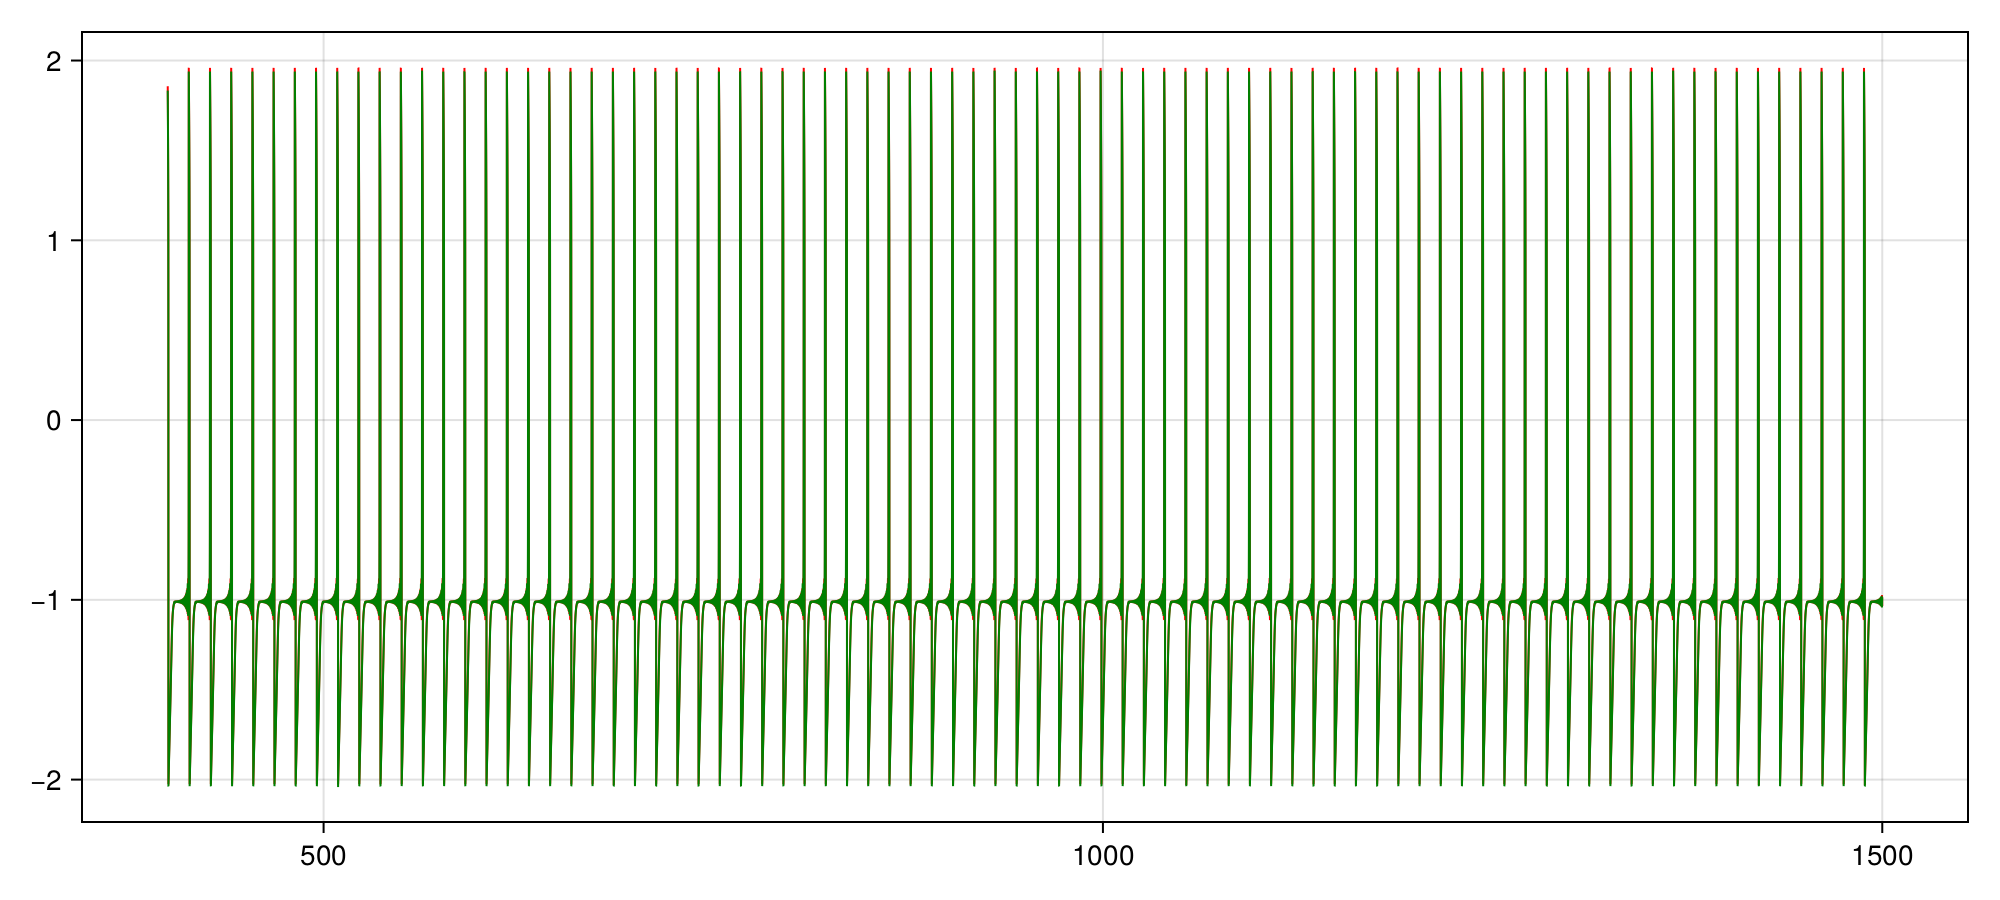

CairoMakie.Screen{IMAGE}


In [14]:
tstart = 400000; tend = 1500000
f = Figure(size = (1000, 450))
ax = Axis(f[1, 1])
lines!(sol.t[tstart:tend], sol[1, tstart:tend], color = :red, linewidth = 1.0)
lines!(sol.t[tstart:tend], sol[3, tstart:tend], color = :green, linewidth = 1.0)
display(f)

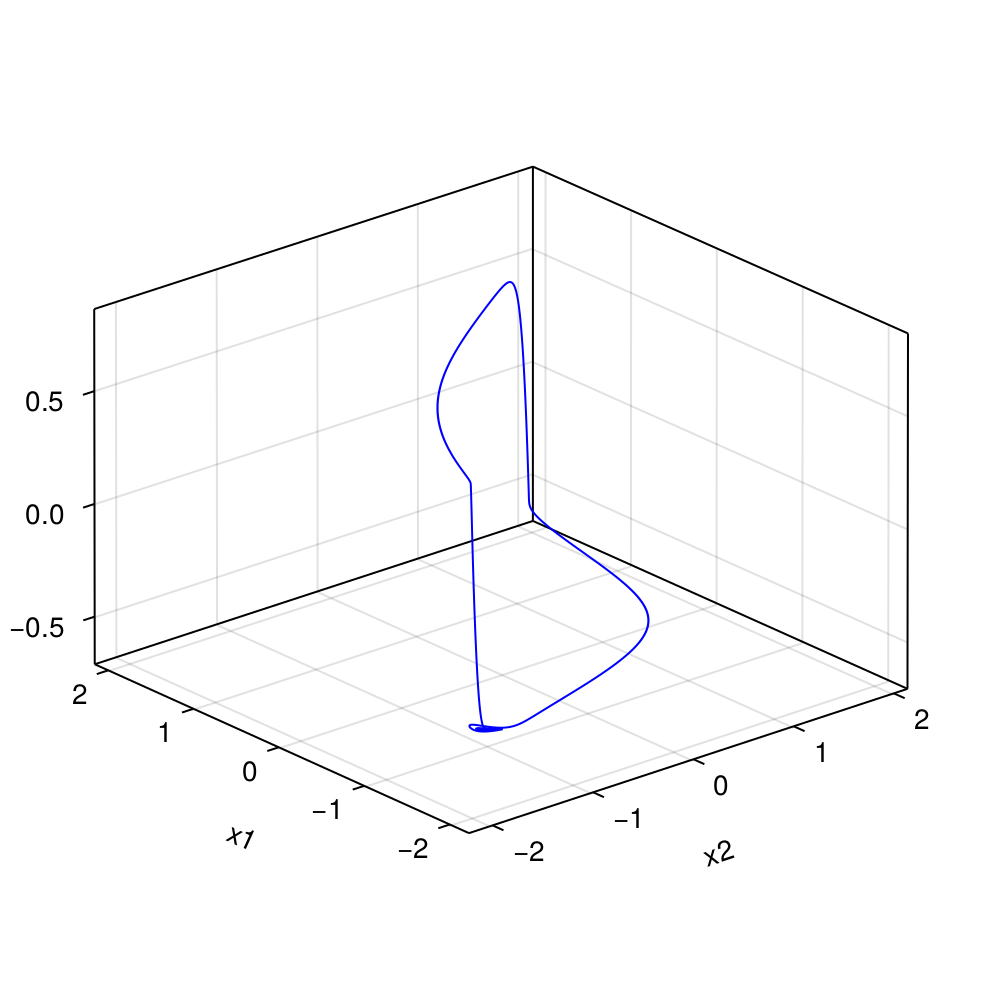

CairoMakie.Screen{IMAGE}


In [15]:
tstart = 400000; tend = 1500000
f = Figure(size = (500, 500))
ax = Axis3(f[1, 1], xlabel = "x2", ylabel = "x1", zlabel = "y2")

lines!(sol[3, tstart:tend], sol[1, tstart:tend], sol[2, tstart:tend], color = :blue, linewidth = 1.0)

display(f)

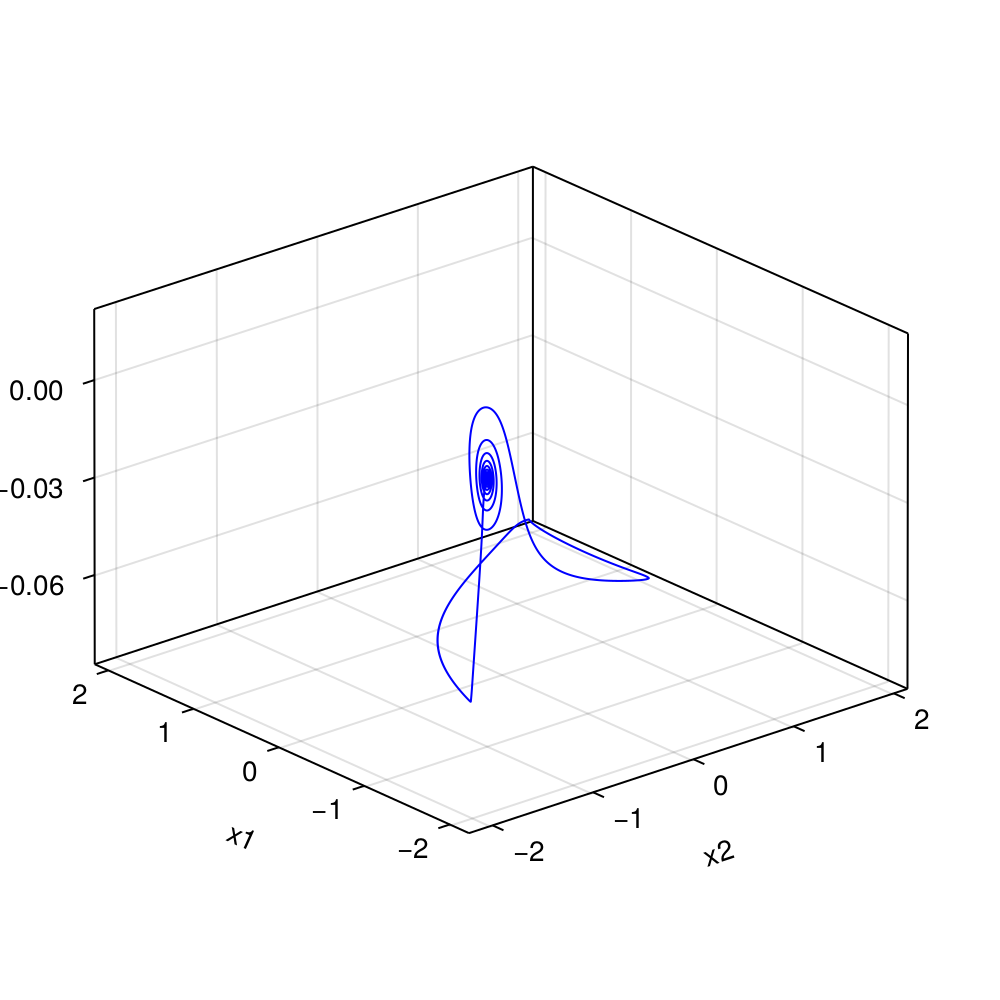

CairoMakie.Screen{IMAGE}


In [16]:
tstart = 400000; tend = 1500000
f = Figure(size = (500, 500))
ax = Axis3(f[1, 1], xlabel = "x2", ylabel = "x1", zlabel = "z")

lines!(sol[3, tstart:tend], sol[1, tstart:tend], sol[5, tstart:tend], color = :blue, linewidth = 1.0)

display(f)